In [6]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv


In [2]:
!pip install kaggle

In [6]:
import os
os.environ['KAGGLE_USERNAME'] = "retroflake"
os.environ['KAGGLE_KEY'] = ""

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data
api.dataset_list_files("mczielinski/bitcoin-historical-data")

In [10]:
api.dataset_download_files('mczielinski/bitcoin-historical-data', path=".")

In [11]:
data = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv')

In [12]:
data.shape

(4857377, 8)

In [10]:
data = data.loc[~data.Open.isnull()]

In [11]:
data.shape

(3613769, 8)

In [12]:
round(data.shape[0]*0.8)

2891015

In [13]:
training_data = data.iloc[:round(data.shape[0]*0.8),:].reset_index(drop=True)
test_data = data.iloc[round(data.shape[0]*0.8):,:].reset_index(drop=True)

In [14]:
training_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.000000,4.390000
1,1325346600,4.39,4.39,4.39,4.39,48.000000,210.720000,4.390000
2,1325350740,4.50,4.57,4.50,4.57,37.862297,171.380338,4.526411
3,1325350800,4.58,4.58,4.58,4.58,9.000000,41.220000,4.580000
4,1325391360,4.58,4.58,4.58,4.58,1.502000,6.879160,4.580000


In [15]:
training_data.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
2891010,1573213560,9008.09,9015.00,9003.49,9015.00,5.793102,52199.255786,9010.588120
2891011,1573213620,9015.00,9015.00,9003.79,9015.00,46.645548,420273.373430,9009.935299
2891012,1573213680,9012.65,9015.00,9012.65,9015.00,2.523000,22740.145000,9013.137138
2891013,1573213740,9013.34,9013.34,9013.00,9013.34,1.880044,16945.420875,9013.309737
2891014,1573213800,9013.34,9020.00,9013.34,9020.00,6.050422,54556.137174,9016.914222


In [16]:
test_data.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1573213860,9013.00,9015.00,9009.31,9015.00,9.679878,87247.433181,9013.277968
1,1573213920,9011.74,9014.99,9005.35,9014.99,1.341719,12083.364799,9005.886099
2,1573213980,9007.76,9013.45,9007.76,9013.45,0.016125,145.313706,9011.641245
3,1573214040,9010.00,9010.00,9007.90,9007.90,0.230217,2073.882044,9008.383548
4,1573214100,9010.00,9015.00,9006.25,9008.90,3.154151,28428.439017,9013.023798


In [17]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891015 entries, 0 to 2891014
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Timestamp          int64  
 1   Open               float64
 2   High               float64
 3   Low                float64
 4   Close              float64
 5   Volume_(BTC)       float64
 6   Volume_(Currency)  float64
 7   Weighted_Price     float64
dtypes: float64(7), int64(1)
memory usage: 176.5 MB


In [18]:
training_set = training_data.iloc[:, 1:2].values
test_set = test_data.iloc[:, 1:2].values

In [19]:
training_set.shape, test_set.shape

((2891015, 1), (722754, 1))

In [20]:
# feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(-1,1))
sc.fit(training_set)

MinMaxScaler(feature_range=(-1, 1))

In [21]:
training_set_scaled = sc.transform(training_set)
test_set_scaled = sc.transform(test_set)

In [22]:
test_set_scaled

array([[-0.08359085],
       [-0.08371902],
       [-0.08412386],
       ...,
       [ 4.96986567],
       [ 4.97482448],
       [ 4.97742544]])

In [23]:
# Creating a data structure with 60 timesteps and 1 output
x_train = []
y_train = []

for i in range(60, training_set_scaled.shape[0]):
  x_train.append(training_set_scaled[i-60:i, 0])
  y_train.append(training_set_scaled[i, 0])

# converting x_train and y_train into numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [24]:
x_train

array([[-0.99993999, -0.99993999, -0.9999288 , ..., -0.99975587,
        -0.99976605, -0.99977622],
       [-0.99993999, -0.9999288 , -0.99992066, ..., -0.99976605,
        -0.99977622, -0.99969484],
       [-0.9999288 , -0.99992066, -0.99992066, ..., -0.99977622,
        -0.99969484, -0.99968467],
       ...,
       [-0.0854218 , -0.0854218 , -0.0854218 , ..., -0.08393975,
        -0.08409029, -0.08338741],
       [-0.0854218 , -0.0854218 , -0.08588971, ..., -0.08409029,
        -0.08338741, -0.08362645],
       [-0.0854218 , -0.08588971, -0.08483081, ..., -0.08338741,
        -0.08362645, -0.08355627]])

In [25]:
y_train

array([-0.99969484, -0.99968467, -0.9996745 , ..., -0.08362645,
       -0.08355627, -0.08355627])

In [26]:
x_train.shape

(2890955, 60)

In [27]:
# reshaping dataset
x_train = x_train.reshape(x_train.shape[0], 60, 1)

In [28]:
x_train.shape

(2890955, 60, 1)

In [29]:
!pip install -U tensorflow-gpu==2.12.0
import tensorflow as tf
tf.__version__

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [18 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/tmp/pip-install-1_p8ez7n/tensorflow-gpu_faf480d44f134ee9a0547ac6498bfe8d/setup.py", line 37, in <module>
          raise Exception(TF_REMOVAL_WARNING)
      Exception:
      
      The "tensorflow-gpu" package has been removed!
      
      Please install "tensorflow" instead.
      
      Other than the name, the two packages have been identical
      since TensorFlow 2.1, or roughly since Sep 2019. For more
      information, see: pypi.org/project/tensorflow-gpu
      
      
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  Running

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

'2.12.0'

In [30]:
# define an object (inilitizing RNN)
model = tf.keras.models.Sequential()

In [31]:
# first LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True, input_shape=(60,1)))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# second LSTM layer
model.add(tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# third LSTM layer
model.add(tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

# fourth LSTM layer
model.add(tf.keras.layers.LSTM(units=120, activation='relu'))
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [32]:
# output layer
model.add(tf.keras.layers.Dense(units=1))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 60)            14880     
                                                                 
 dropout (Dropout)           (None, 60, 60)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 60)            29040     
                                                                 
 dropout_1 (Dropout)         (None, 60, 60)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 80)            45120     
                                                                 
 dropout_2 (Dropout)         (None, 60, 80)            0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [34]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [35]:
model.fit(x_train, y_train, batch_size=10000, epochs=5)

Epoch 1/5
290/290 [==============================] - 177s 576ms/step - loss: 0.0230
Epoch 2/5
290/290 [==============================] - 167s 576ms/step - loss: 0.0028
Epoch 3/5
290/290 [==============================] - 168s 579ms/step - loss: 0.0025
Epoch 4/5
290/290 [==============================] - 170s 585ms/step - loss: 0.0023
Epoch 5/5
290/290 [==============================] - 171s 590ms/step - loss: 0.0022


In [37]:
x_test = []
for i in range(60, test_set_scaled.shape[0]):
  x_test.append(test_set_scaled[i-60:i, 0])

In [39]:
x_test[0]

array([-0.08359085, -0.08371902, -0.08412386, -0.08389601, -0.08389601,
       -0.08399061, -0.08396315, -0.08338741, -0.08414624, -0.08383701,
       -0.08550114, -0.08442597, -0.08521836, -0.0846762 , -0.08389601,
       -0.0842622 , -0.08389601, -0.08501492, -0.08501696, -0.08593752,
       -0.08571882, -0.08532008, -0.08532008, -0.08553776, -0.0852031 ,
       -0.0853038 , -0.08563948, -0.08537603, -0.08635762, -0.08664345,
       -0.0859304 , -0.0859304 , -0.0859304 , -0.08561913, -0.0859304 ,
       -0.08605856, -0.0863983 , -0.08787527, -0.08695166, -0.08700353,
       -0.08685401, -0.08516954, -0.08527532, -0.08614401, -0.08536789,
       -0.08531703, -0.086676  , -0.08527736, -0.08501899, -0.08377598,
       -0.08397027, -0.08282084, -0.08313718, -0.08365188, -0.08359289,
       -0.0849132 , -0.08585817, -0.0851258 , -0.08528651, -0.08492846])

In [40]:
# convert in numpy array
x_test = np.array(x_test)
print(x_test.shape)
# convert in 3D (required to process)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)



(722694, 60)
(722694, 60, 1)


In [41]:
# getting predicted stock prices
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

22585/22585 [==============================] - 829s 37ms/step


In [43]:
print(predicted_stock_price[5]), print(test_set[5])

[8845.113]
[9009.07]


(None, None)

In [62]:
test_set.shape[0]/260000

2.7798230769230767

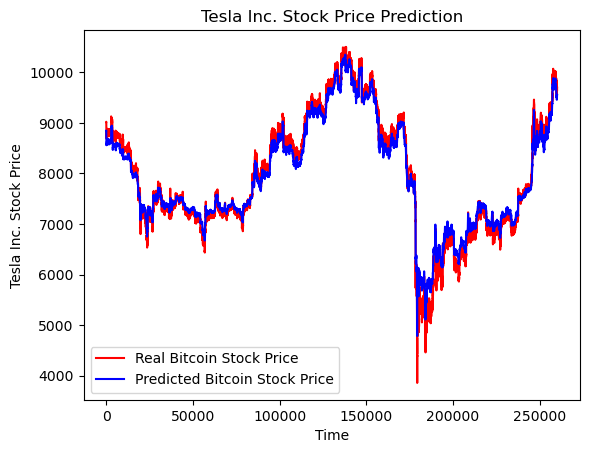

In [59]:
# Visualising the results
plt.plot(test_set[:260000], color='red', label='Real Bitcoin Stock Price')
plt.plot(predicted_stock_price[:260000], color='blue', label='Predicted Bitcoin Stock Price')
plt.title('Tesla Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Inc. Stock Price')
plt.legend()
plt.show()

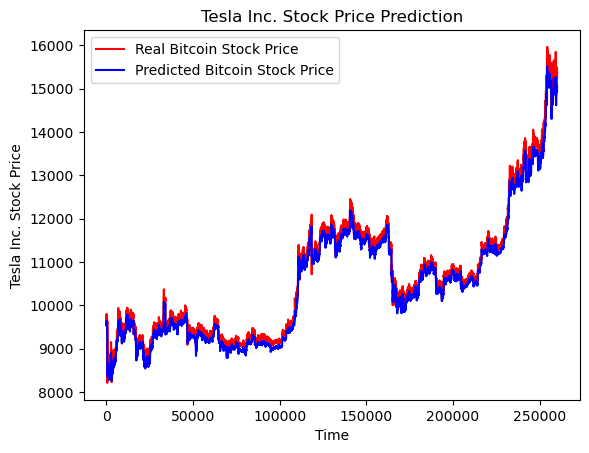

In [60]:
# Visualising the results
plt.plot(test_set[260000:520000], color='red', label='Real Bitcoin Stock Price')
plt.plot(predicted_stock_price[260000:520000], color='blue', label='Predicted Bitcoin Stock Price')
plt.title('Tesla Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Inc. Stock Price')
plt.legend()
plt.show()

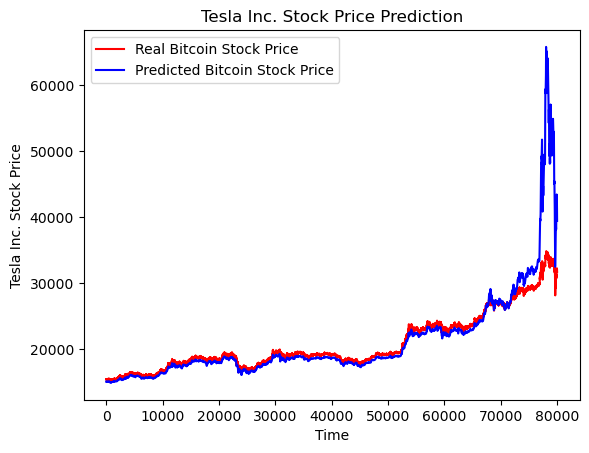

In [64]:
# Visualising the results
plt.plot(test_set[520000:600000], color='red', label='Real Bitcoin Stock Price')
plt.plot(predicted_stock_price[520000:600000], color='blue', label='Predicted Bitcoin Stock Price')
plt.title('Tesla Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Inc. Stock Price')
plt.legend()
plt.show()

In [65]:
input_layer = tf.keras.layers.Input(shape=(60, 1))

# LSTM layers
lstm_1 = tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True)(input_layer)
lstm_1_dropout = tf.keras.layers.Dropout(0.2)(lstm_1)

lstm_2 = tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True)(lstm_1_dropout)
lstm_2_dropout = tf.keras.layers.Dropout(0.2)(lstm_2)

lstm_3 = tf.keras.layers.LSTM(units=60, activation='relu', return_sequences=True)(lstm_2_dropout)
lstm_3_dropout = tf.keras.layers.Dropout(0.2)(lstm_3)

# Attention mechanism
attention = tf.keras.layers.Attention()([lstm_1_dropout, lstm_2_dropout])

# Concatenate attention output with LSTM layer output
concatenated = tf.keras.layers.Concatenate()([attention, lstm_3_dropout])

lstm_4 = tf.keras.layers.LSTM(units=80, activation='relu', return_sequences=True)(concatenated)
lstm_4_dropout = tf.keras.layers.Dropout(0.2)(lstm_4)

lstm_5 = tf.keras.layers.LSTM(units=120, activation='relu')(lstm_4_dropout)
lstm_5_dropout = tf.keras.layers.Dropout(0.2)(lstm_5)



# Output layer
output = tf.keras.layers.Dense(1)(lstm_5_dropout)

# Create the model
model_attention = tf.keras.models.Model(inputs=input_layer, outputs=output)

In [67]:
model_attention.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 60, 1)]      0           []                               
                                                                                                  
 lstm_4 (LSTM)                  (None, 60, 60)       14880       ['input_1[0][0]']                
                                                                                                  
 dropout_4 (Dropout)            (None, 60, 60)       0           ['lstm_4[0][0]']                 
                                                                                                  
 lstm_5 (LSTM)                  (None, 60, 60)       29040       ['dropout_4[0][0]']              
                                                                                              

In [68]:
model_attention.compile(optimizer='adam', loss='mean_squared_error')

In [70]:
model_attention.fit(x_train, y_train, batch_size=10000, epochs=5)

Epoch 1/5
290/290 [==============================] - 216s 742ms/step - loss: 0.0056
Epoch 2/5
290/290 [==============================] - 214s 737ms/step - loss: 0.0028
Epoch 3/5
290/290 [==============================] - 215s 741ms/step - loss: 0.0026
Epoch 4/5
290/290 [==============================] - 215s 740ms/step - loss: 0.0024
Epoch 5/5
290/290 [==============================] - 218s 750ms/step - loss: 0.0023


In [72]:
# getting predicted stock prices
predicted_stock_price_at = model_attention.predict(x_test)
predicted_stock_price_at = sc.inverse_transform(predicted_stock_price_at)

22585/22585 [==============================] - 1093s 48ms/step


In [73]:
print(predicted_stock_price_at[5]), print(test_set[5])

[8829.566]
[9009.07]


(None, None)

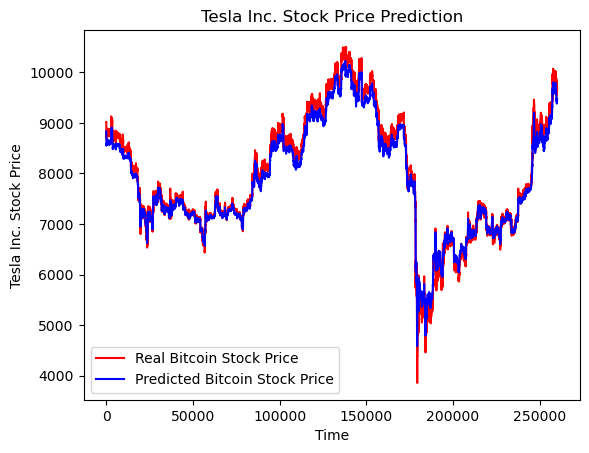

In [74]:
# Visualising the results
plt.plot(test_set[:260000], color='red', label='Real Bitcoin Stock Price')
plt.plot(predicted_stock_price_at[:260000], color='blue', label='Predicted Bitcoin Stock Price')
plt.title('Tesla Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Inc. Stock Price')
plt.legend()
plt.show()

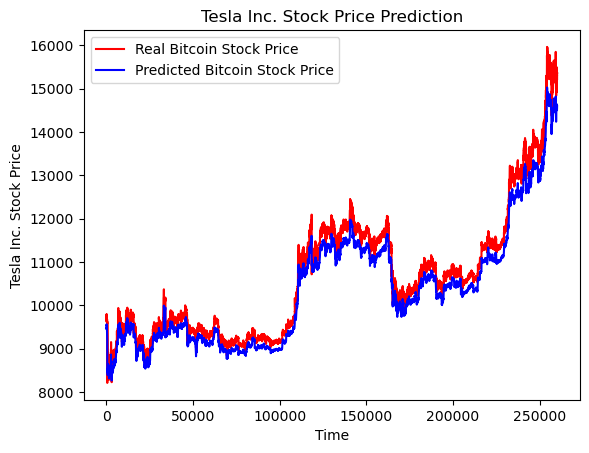

In [75]:
# Visualising the results
plt.plot(test_set[260000:520000], color='red', label='Real Bitcoin Stock Price')
plt.plot(predicted_stock_price_at[260000:520000], color='blue', label='Predicted Bitcoin Stock Price')
plt.title('Tesla Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Inc. Stock Price')
plt.legend()
plt.show()

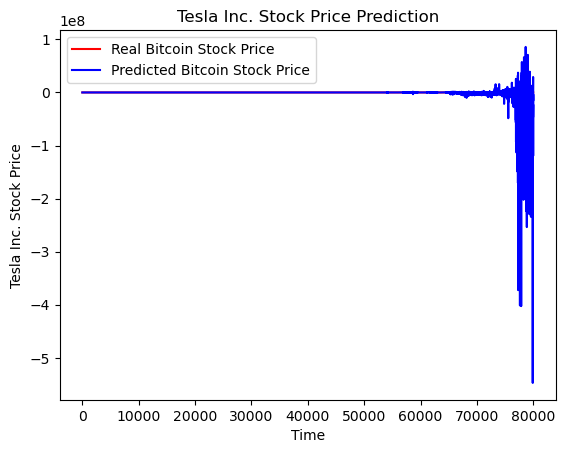

In [76]:
# Visualising the results
plt.plot(test_set[520000:600000], color='red', label='Real Bitcoin Stock Price')
plt.plot(predicted_stock_price_at[520000:600000], color='blue', label='Predicted Bitcoin Stock Price')
plt.title('Tesla Inc. Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Tesla Inc. Stock Price')
plt.legend()
plt.show()